# Principal Component Analysis using Sklearn on Human Activity Dataset
## Dataset downloaded from https://zenodo.org/records/3351545
##  CPE 490 590
### Author: Rahul Bhadani

# Load the dataset

We only need pose features and we will discard other features

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
features = ["Ax", "Ay", "Az", "Mx", "My", "Mz", "Ch"]
df = pd.read_csv('dataset.csv')
X = df[features]
labels = df["Label"]
labels

0       0
1       0
2       0
3       0
4       0
       ..
8702    5
8703    5
8704    5
8705    5
8706    5
Name: Label, Length: 8707, dtype: int64

### From Label we see that there are five different kind of activities


# Standardize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply PCA

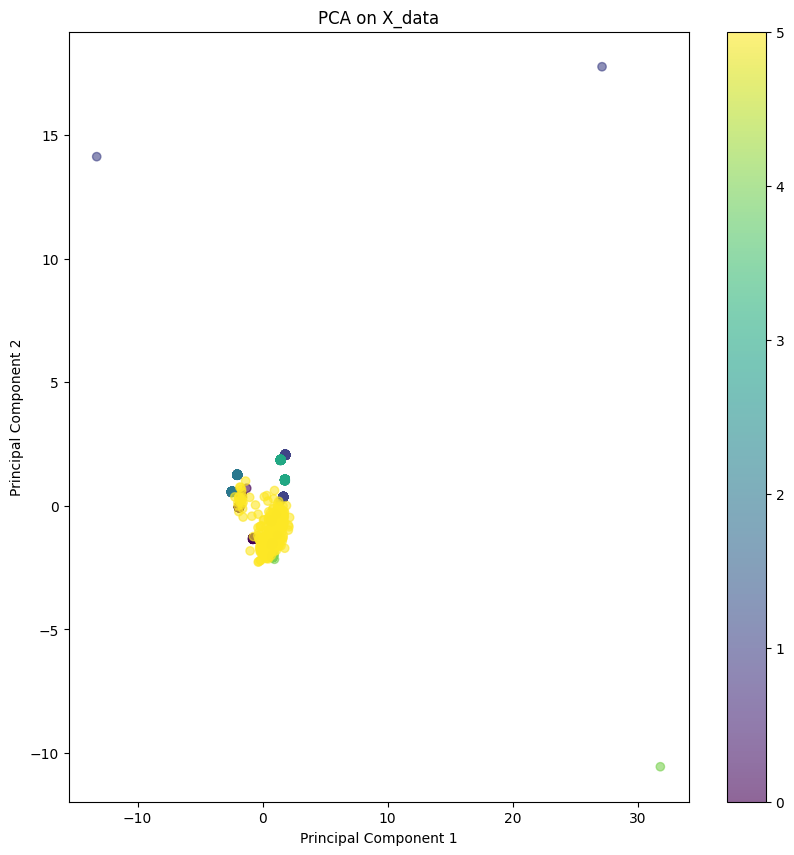

In [ ]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)



# Make 2D plot

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10,10))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on X_data')
plt.colorbar(scatter)
plt.show()

# Apply PCA and Make 3D Plot

In [7]:
# Apply PCA
pca_3 = PCA(n_components=3)
data_3d = pca_3.fit_transform(X_scaled)

import plotly.express as px
import pandas as pd
# Create a DataFrame for the 3D PCA result
df_3d = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['Label'] = labels  # Add the labels to the DataFrame

# Create the 3D plot
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', color='Label')

# Customize the axes labels
fig.update_layout(scene=dict(
                    xaxis=dict(range=[df_3d['PC1'].min(), df_3d['PC1'].max()]),
                    yaxis=dict(range=[df_3d['PC2'].min(), df_3d['PC2'].max()]),
                    zaxis=dict(range=[df_3d['PC3'].min(), df_3d['PC3'].max()]),
                    aspectmode='cube',
                    xaxis_title='PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)),
                    yaxis_title='PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)),
                    zaxis_title='PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2))
))

fig.show()



# Observation

We observe that in 2D different activities are not distinguishable but in3D they are distinuguishable